# CSE:382 Data Mining and Business Intelligence

Prepared by:
Sohayla Ihab Hamed [19P7343]
Youssef Mahmoud Massoud [18P8814]
Salma Ihab Abdelmawgoud [19P8794]
Youssef Hany Onsy [18P1789]

Loan prediction is a common data mining problem which most retail banks solve on a 
daily basis. It’s the process of predicting who deserves to receive a given loan and at what 
rate based on certain characteristics of the borrower, be it an individual or a company. 
Those characteristics are mined for their use in a risk assessment process to determine 
the amount of risks the lender (the bank) will be incurring when loaning the particular 
individual/company. 

For example, some banks can model their interest rate for lending 
based on how much risk their model assumes a certain individual pose, and thereby 
require higher interest rates for those who pose higher risks of default and vice versa.
In our project, we use data mining techniques to analyze and predict whether a certain 
individual can be allowed to take a loan from our bank or whether said individual shall be 
denied the loan. This will be based on a set of features like marital status, education, 
employments and other features within the restrictions of the dataset we were provided. 
We will apply various data mining techniques to achieve our required goal where we end 
up with a classification model that we will train and later test.

By the end of this project, we should have a set of divided preprocessing techniques(explained here)
into functions and procedures, such that any real data may be handled

# LOAN PREDICTION

## DATA VISUALIZATION

In [145]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
TrainData = pd.read_csv("Train Data.csv", delimiter = ',', header = 0, index_col = 0)
#print(TrainData)

In [147]:
# showing the univariant statistics for numerical variables
TrainData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [148]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [149]:
TrainData.mode()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,2500,0.0,120.0,360.0,1.0,Semiurban,Y


In [150]:
# showing the bivariant statistics between each variable with the Loan Status(Yes or No)
TrainData.groupby("Loan_Status").describe()

ApplicantIncome                                                   \
                      count         mean          std    min     25%     50%   
Loan_Status                                                                    
N                     192.0  5446.078125  6819.558528  150.0  2885.0  3833.5   
Y                     422.0  5384.068720  5765.441615  210.0  2877.5  3812.5   

                              CoapplicantIncome               ...  \
                 75%      max             count         mean  ...   
Loan_Status                                                   ...   
N            5861.25  81000.0             192.0  1877.807292  ...   
Y            5771.50  63337.0             422.0  1504.516398  ...   

            Loan_Amount_Term        Credit_History                           \
                         75%    max          count      mean       std  min   
Loan_Status                                                                   
N                      360.0  480.0          179.0  0.541899  0.499639  0.0   
Y                      360.0  480.0          385.0  0.981818  0.133782  0.0   

                                 
             25%  50%  75%  max  
Loan_Status                      
N            0.0  1.0  1.0  1.0  
Y            1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

In [151]:
print("kurtosis: ")
TrainData.kurtosis(numeric_only=True)

kurtosis: 


ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

In [152]:
print("skew: ")
TrainData.skew(numeric_only=True)

skew: 


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [153]:
#Notes!! Conclusions to KEEP IN MIND: 
# CoapplicantIncome: 25% is $0. Later, remove tuples where CoapplicantIncome=0 and analyze on its own.
# Loan_Amount_term: Q1, Q2, Q3 = 360. Which means the data is skewed towards their favor. (360 months loan)
# STD is pretty high for ApplicantIncome=6109 and CoapplicantIncome=2926
# Credit_History: Q1, Q2, Q3 = 1. Which means that most people have credit history.
# Note: very important to treat loan term and credit history as categorical, not numerical, since its values are discrete

# skewness determines asymmetrical distribution
# · -0.5 < skewness < 0.5, the data are fairly symmetrical
# ·  -1 < skewness < — 0.5 or  0.5 < skewness < 1, the data are moderately skewed
# · skewness < -1 or skewness > 1, the data are highly skewed

# kurtosis determine the volume of the outlier
# · If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.
# · A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.
# · A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.
# source: https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de

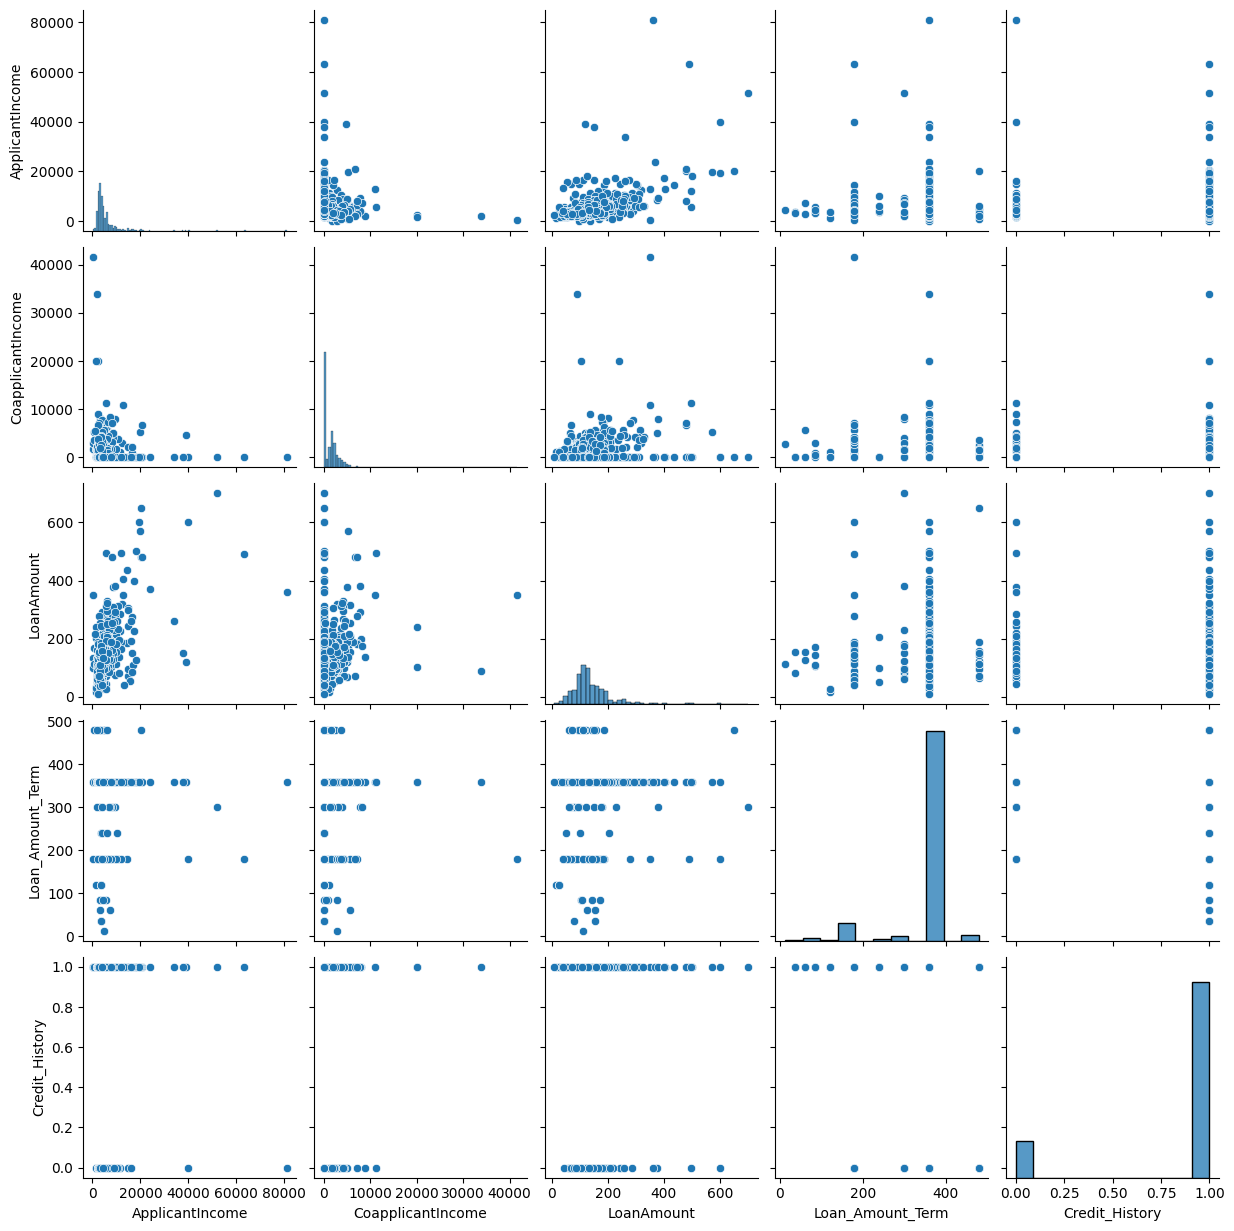

In [154]:
#Visualizing Numerical Features
NumericData = TrainData.select_dtypes(exclude = ['object']).columns.tolist()
TrainData_n = TrainData[NumericData]
#print("Description of Numerical Features:", TrainData.describe()) 


# seaborn histograms (univariate and pairwise)
# TODO tweak this so it looks better. try other things like scatter, density, histo, etc
# TODO please look up how to visualize correlation with the TARGET
# "Numerical features can be visualized by plotting their distribution and having a look at their statistical properties, 
# such as skewness and kurtosis. For categorical features, the distribution is better visualized using histograms. 
# Finally, you can calculate and visualize the correlation between the features and also the features with the target value."
# source: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# tutorial (ref doc): https://seaborn.pydata.org/tutorial/distributions.html
# TODO please examine the correlation matrix results at the end of the notebook, 
# and draw a relational plot with the three most correlated values
# tutorial: https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial
# Important note: this is a very general API. You can adjust more specifically by using jointplot, scatterplot etc.
sns.pairplot(TrainData)

plt.show()

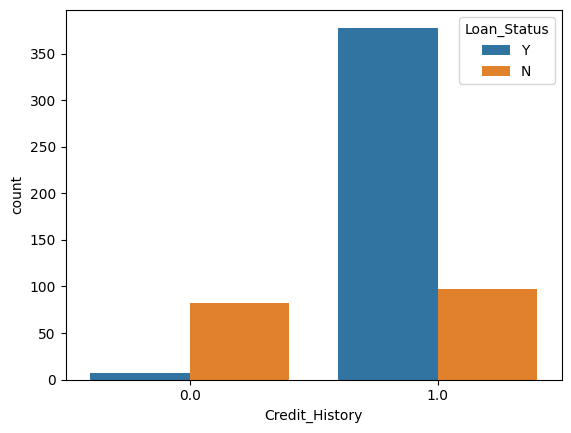

In [155]:
#Visualizing Categorical Features
#TODO use countplot to visualize univariate categorical
sns.countplot(data=TrainData,
    x="Credit_History",
    hue="Loan_Status")
plt.show()

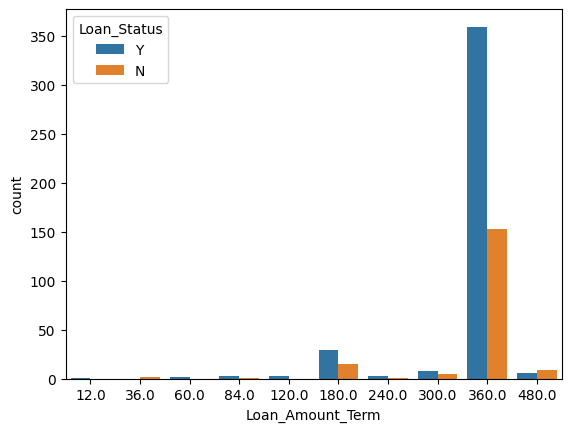

In [156]:
sns.countplot(data=TrainData,
    x="Loan_Amount_Term",
    hue="Loan_Status")
plt.show()

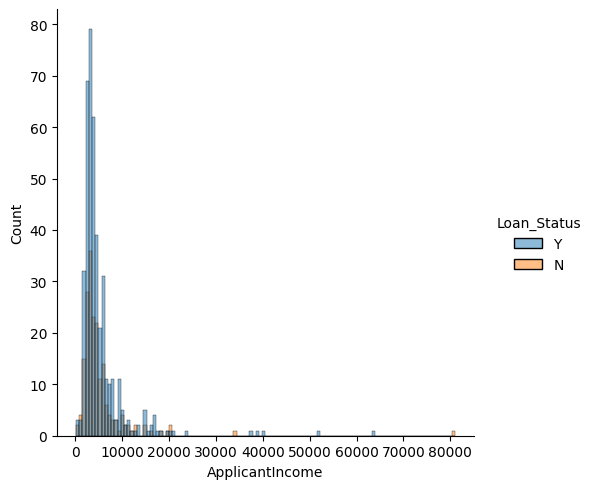

In [157]:
sns.displot(data=TrainData,
    x="ApplicantIncome", #y='ApplicantIncome',
    hue="Loan_Status")
plt.show()

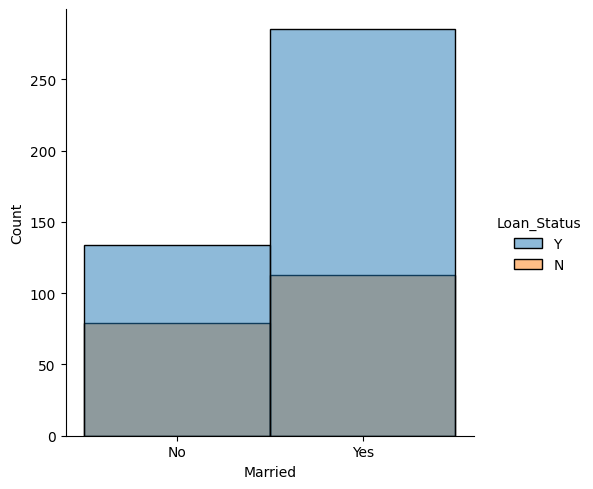

In [158]:
sns.displot(
    data=TrainData, #kind ="count",
    x="Married" , hue="Loan_Status"#, element="step"
)
plt.show()

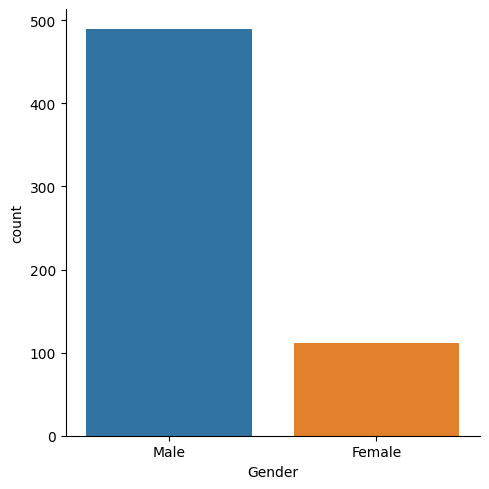

In [159]:
sns.catplot(
    data=TrainData, kind ="count",
    x="Gender" 
)
plt.show()

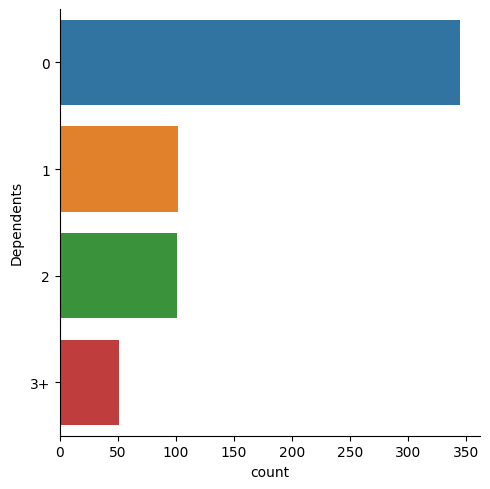

In [160]:
sns.catplot(
    data=TrainData, kind ="count",
    y="Dependents", #hue="Loan_Status"#, palette="ch:.25" 
)
plt.show()

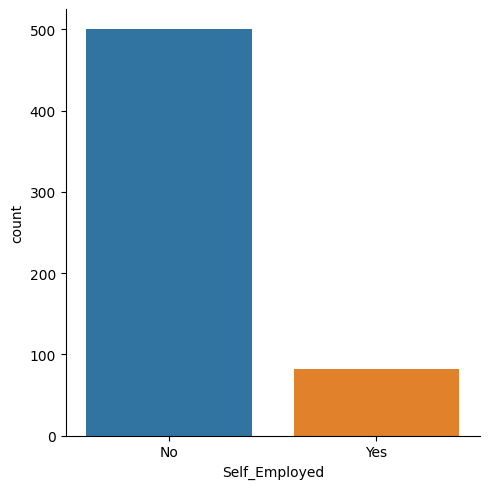

In [161]:
sns.catplot(
    data=TrainData, kind ="count",
    x="Self_Employed"
)
plt.show()

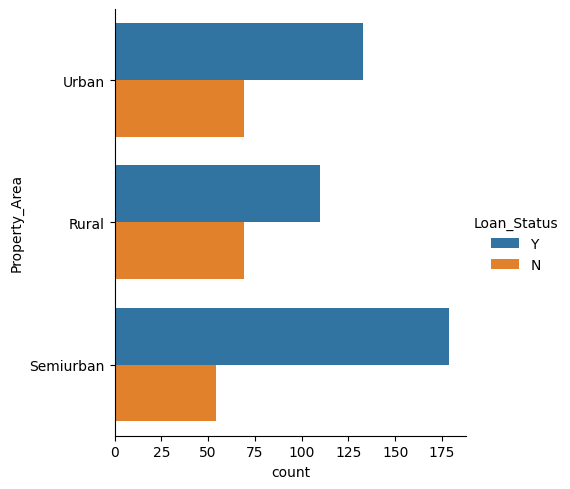

In [162]:
sns.catplot(
    data=TrainData, kind ="count",
    y="Property_Area", hue="Loan_Status"#, palette="ch:.25" 
)
plt.show()

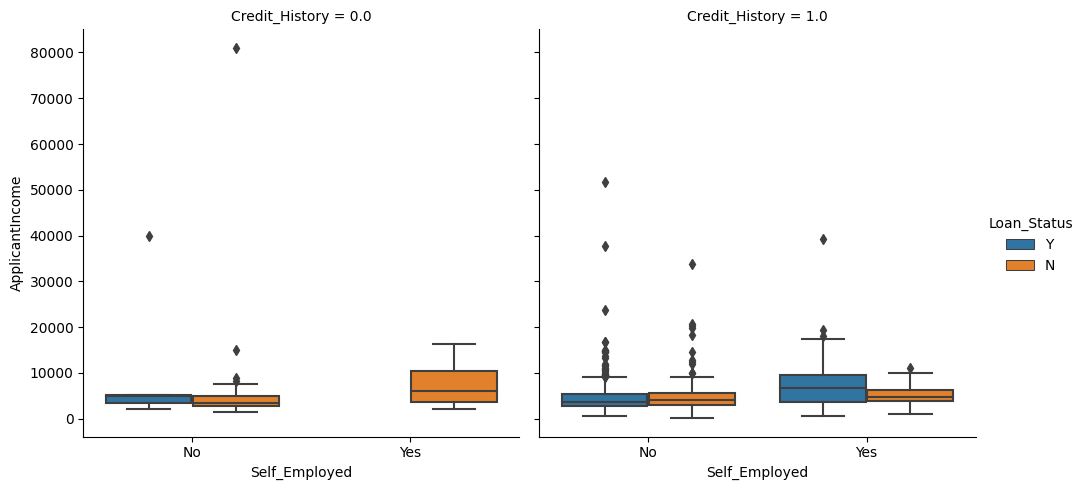

In [163]:
sns.catplot(
    data=TrainData, kind ="box", y="ApplicantIncome",
    x="Self_Employed", hue="Loan_Status", col="Credit_History"#, palette="ch:.25" 
)
plt.show()

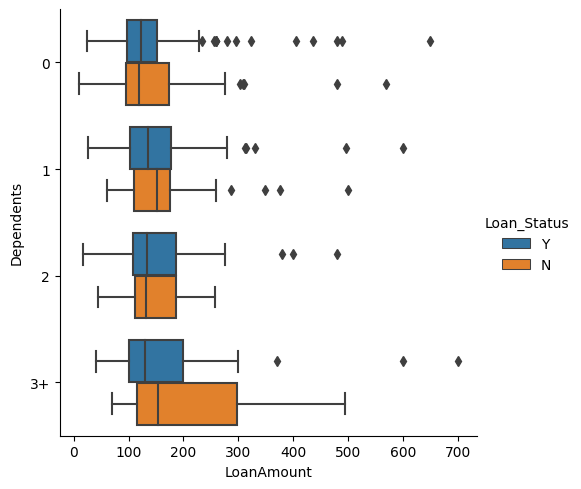

In [164]:
#catplot is used
sns.catplot(
    data=TrainData, kind ="box",
    x="LoanAmount", y="Dependents", 
    hue="Loan_Status" 
)
plt.show()
# When categories are harder to define, we will use binning methods.
# Scroll below to binning.

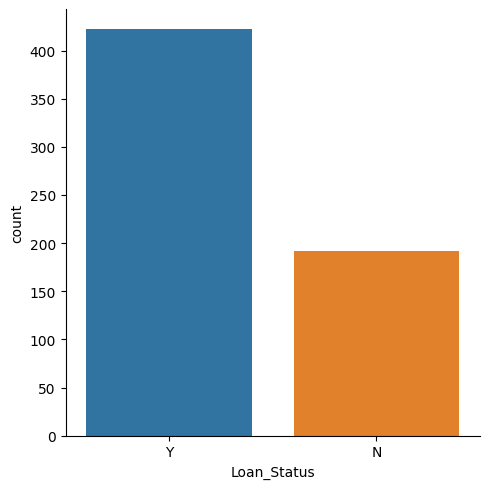

In [165]:
sns.catplot(
    data=TrainData, kind ="count",
    x="Loan_Status"
)
plt.show()

## DATA CLEANING

### Handle Missing Data

Identify missing data of both types, numerical and categorical data

In [166]:
NumericData = TrainData.select_dtypes(exclude = ['object']).columns.tolist()
TrainData_n = TrainData[NumericData]
#print(TrainData_n, '\n')

CategoricData = TrainData.select_dtypes(include = ['object']).columns.tolist()
TrainData_c = TrainData[CategoricData]
#print(TrainData_c, '\n')

In [167]:
# Drop duplicates
print(TrainData.shape)
TrainData.drop_duplicates(inplace=True)
print(TrainData.shape)

(614, 12)
(614, 12)


In [168]:
# Now, we try to figure out what kind of missing values are there. 
# “0”, “Not Applicable”, “NA”, “None”, “Null”, or “INF” all can mean that the value is missing.
for feature in TrainData.columns:
    res = list(set(TrainData[feature]))
    print(res)

# Therefore, all missing values are np.nan or None

[nan, 'Male', 'Female']
[nan, 'No', 'Yes']
[nan, '2', '0', '1', '3+']
['Not Graduate', 'Graduate']
[nan, 'No', 'Yes']
[4100, 2058, 4106, 2060, 2071, 4124, 2083, 4133, 4160, 4166, 4167, 6216, 2130, 2132, 4180, 2137, 2138, 4188, 4191, 2149, 4200, 6250, 8300, 6256, 2165, 2167, 4226, 2178, 6277, 4230, 6283, 8333, 8334, 16525, 2192, 150, 2213, 2214, 10408, 2221, 10416, 6325, 4281, 4283, 20667, 2237, 6333, 2239, 4288, 4300, 2253, 4301, 210, 12500, 4310, 2275, 2281, 39147, 4333, 6383, 4342, 14583, 4344, 2297, 2301, 4350, 6400, 4354, 2309, 6406, 10513, 6417, 2330, 16667, 16666, 2333, 4384, 2346, 4400, 16692, 4408, 2366, 4416, 2378, 2383, 2395, 14683, 2400, 20833, 6500, 4467, 8566, 2423, 2425, 2435, 2439, 6540, 2454, 416, 2473, 2479, 8624, 2483, 2484, 2491, 2492, 2499, 2500, 4547, 4554, 2507, 2510, 6608, 4566, 8666, 2526, 4583, 6633, 2550, 4600, 10750, 4606, 4608, 4616, 2577, 14866, 4625, 2583, 14880, 2600, 12841, 4652, 6700, 8750, 2609, 51763, 4666, 2620, 2625, 4680, 4683, 12876, 10833, 4691, 

In [169]:
# First Approach: removing tuples. We remove tuples only if the dataset is large enough, and the tuple has multiple missing values.
# Complete Case Analysis(CCA) may be used if data is MAR (Missing At Random)

print(TrainData.isnull().sum()) #returns np.na or None
print(TrainData.shape)
TrainData_nonull = TrainData.dropna(inplace=False)
print(TrainData_nonull.shape)

# Credit_History is the feature with the most missing tuples, but 50/641 is not significant enough to discard the feature entirely.
# 480/641 tuples remain. That's only around 78.18% of data. 
# Around 21.8% of data tuples have missing values. This may not be the best approach. Once the classification models are completed, 
# we can test using both datasets and evaluate their accuracy.

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(614, 12)
(480, 12)


In [170]:
# Second Approach: Using conclusions from data visualization section, decide for each feature how to fill the missing values.
# Gender: most_frequent (male), since there is a huge variance between the two.
# Married: we can drop the 3 tuples, knowing, their effect over 614 tuples is not significant anyway.
# Dependents: knn
# Self-Employed: knn
# LoanAmount: (normally distributed variable, since mean=342, median=360, mode=360) impute with mean
# Loan_Amount_Term: impute with median
# Credit_History: knn



#TODO later, we can fill the missing values using a regression model. (if we have time, research)



# Note: In regards to imputing missing data: "Mean is most useful when the original data is not skewed, 
# while the median is more robust, not sensitive to outliers, and thus used when data is skewed.
# "It is worth mentioning that linear regression models are sensitive to outliers.
# "𝑘 nearest neighbour imputation, which classifies similar records and put them together, can also be utilized. 
# A missing value is then filled out by finding first the 𝑘 records closest to the record with missing values. 
# Next, a value is chosen from (or computed out of) the 𝑘 nearest neighbours."
# source: https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4
# "One thing to note here is that the KNN Imputer does not recognize text data values." We must discretize categorical features first.
# "Another critical point here is that the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. 
# Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values."
# source: https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
# very IMPORTANT read, for later phases, on how to structure our preprocessing + predictors: (STACKING)
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py

In [171]:
MostFreqImputer = SimpleImputer(missing_values = np.NaN , strategy = 'most_frequent') #cat and num
MeanImputer = SimpleImputer(missing_values = np.NaN , strategy = 'mean') #num
MedianImputer = SimpleImputer(missing_values = np.NaN , strategy = 'median') #num
#MedianCatImputer = SimpleImputer(missing_values = np.NaN , strategy = 'constant', fill_value="calc median for feature x") #cat

In [172]:
# For Gender: mode
TrainData_Gender = np.array(TrainData['Gender']).reshape(-1, 1)
MostFreqImputer.fit(TrainData_Gender)
TrainData_Gender = MostFreqImputer.transform(TrainData_Gender)
TrainData_Gender = TrainData_Gender.flatten()
TrainData['Gender'] = TrainData_Gender

In [173]:
# For LoanAmount: mean
TrainData_LoanA = np.array(TrainData['LoanAmount']).reshape(-1, 1)
MeanImputer.fit(TrainData_LoanA)
TrainData_LoanA = MeanImputer.transform(TrainData_LoanA)
TrainData_LoanA = TrainData_LoanA.flatten()
#print(TrainData_LoanA.shape)

TrainData['LoanAmount'] = TrainData_LoanA

In [174]:
# For Loan_Amount_Term: median
TrainData_LoanT = np.array(TrainData['Loan_Amount_Term']).reshape(-1, 1)
MedianImputer.fit(TrainData_LoanT)
TrainData_LoanT = MedianImputer.transform(TrainData_LoanT)
TrainData_LoanT = TrainData_LoanT.flatten()
print(TrainData_LoanT.shape)
TrainData['Loan_Amount_Term'] = TrainData_LoanT

(614,)


In [175]:
# For Married: drop

import math

TrainData_Married = TrainData.copy()
print(TrainData_Married.isnull().sum())
print(TrainData_Married.shape)

TrainData_Married = TrainData_Married.drop(index=[row for row in TrainData_Married.index 
                                                  if pd.isna(TrainData_Married.loc[row, 'Married'])])

print(TrainData_Married.isnull().sum())
print(TrainData_Married.shape)

TrainData = TrainData_Married.copy()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(614, 12)
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(611, 12)


KNNImputer to impute missing Dependents, Self_Employed, and Credit_History

Step 1) LabelEncoder

In [176]:
# Dependents: knn
# Self-Employed: knn
# Credit_History: knn


# KNN (after discretization and normalization as discussed in the comments)

# To find KNN between gender and loan_status, first use encoding to convert all categoric data into numeric data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
genderlabels = label_encoder.fit_transform(TrainData['Gender'])
dependentslabels = label_encoder.fit_transform(TrainData['Dependents'])
selfemployedlabels = label_encoder.fit_transform(TrainData['Self_Employed'])
credithistorylabels = label_encoder.fit_transform(TrainData['Credit_History'])
marriedlabels = label_encoder.fit_transform(TrainData['Married'])
educationlabels = label_encoder.fit_transform(TrainData['Education'])
propertylabels = label_encoder.fit_transform(TrainData['Property_Area'])
loanstatuslabels = label_encoder.fit_transform(TrainData['Loan_Status'])


unique = np.unique(genderlabels)
print("Gender labels: ", unique)
print(list(set(TrainData['Gender'])))

unique = np.unique(dependentslabels)
print("Dependents labels: ", unique)
print(list(set(TrainData['Dependents'])))

unique = np.unique(selfemployedlabels)
print("Self_Employed labels: ", unique)
print(list(set(TrainData['Self_Employed'])))

unique = np.unique(credithistorylabels)
print("Credit_History labels: ", unique)
print(list(set(TrainData['Credit_History'])))

unique = np.unique(marriedlabels)
print("Married labels: ", unique)
print(list(set(TrainData['Married'])))

unique = np.unique(educationlabels)
print("Education labels: ", unique)
print(list(set(TrainData['Education'])))

unique = np.unique(propertylabels)
print("Property_Area labels: ", unique)
print(list(set(TrainData['Property_Area'])))

unique = np.unique(loanstatuslabels)
print("Loan_Status labels: ", unique)
print(list(set(TrainData['Loan_Status'])))


#Add to numeric table
TrainData_encoded = TrainData.copy()
TrainData_encoded['Gender'] = genderlabels  
TrainData_encoded['Dependents'] = dependentslabels  
TrainData_encoded['Self_Employed'] = selfemployedlabels  
TrainData_encoded['Credit_History'] = credithistorylabels  
TrainData_encoded['Married'] = marriedlabels  
TrainData_encoded['Education'] = educationlabels  
TrainData_encoded['Property_Area'] = propertylabels  
TrainData_encoded['Loan_Status'] = loanstatuslabels  



TrainData_encoded

Gender labels:  [0 1]
['Male', 'Female']
Dependents labels:  [0 1 2 3 4]
[nan, '2', '0', '1', '3+']
Self_Employed labels:  [0 1 2]
[nan, 'No', 'Yes']
Credit_History labels:  [0 1 2]
[0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Married labels:  [0 1]
['No', 'Yes']
Education labels:  [0 1]
['Not Graduate', 'Graduate']
Property_Area labels:  [0 1 2]
['Rural', 'Urban', 'Semiurban']
Loan_Status labels:  [0 1]
['Y', 'N']


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1
LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1
LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1


Step 2) MinMaxScaler

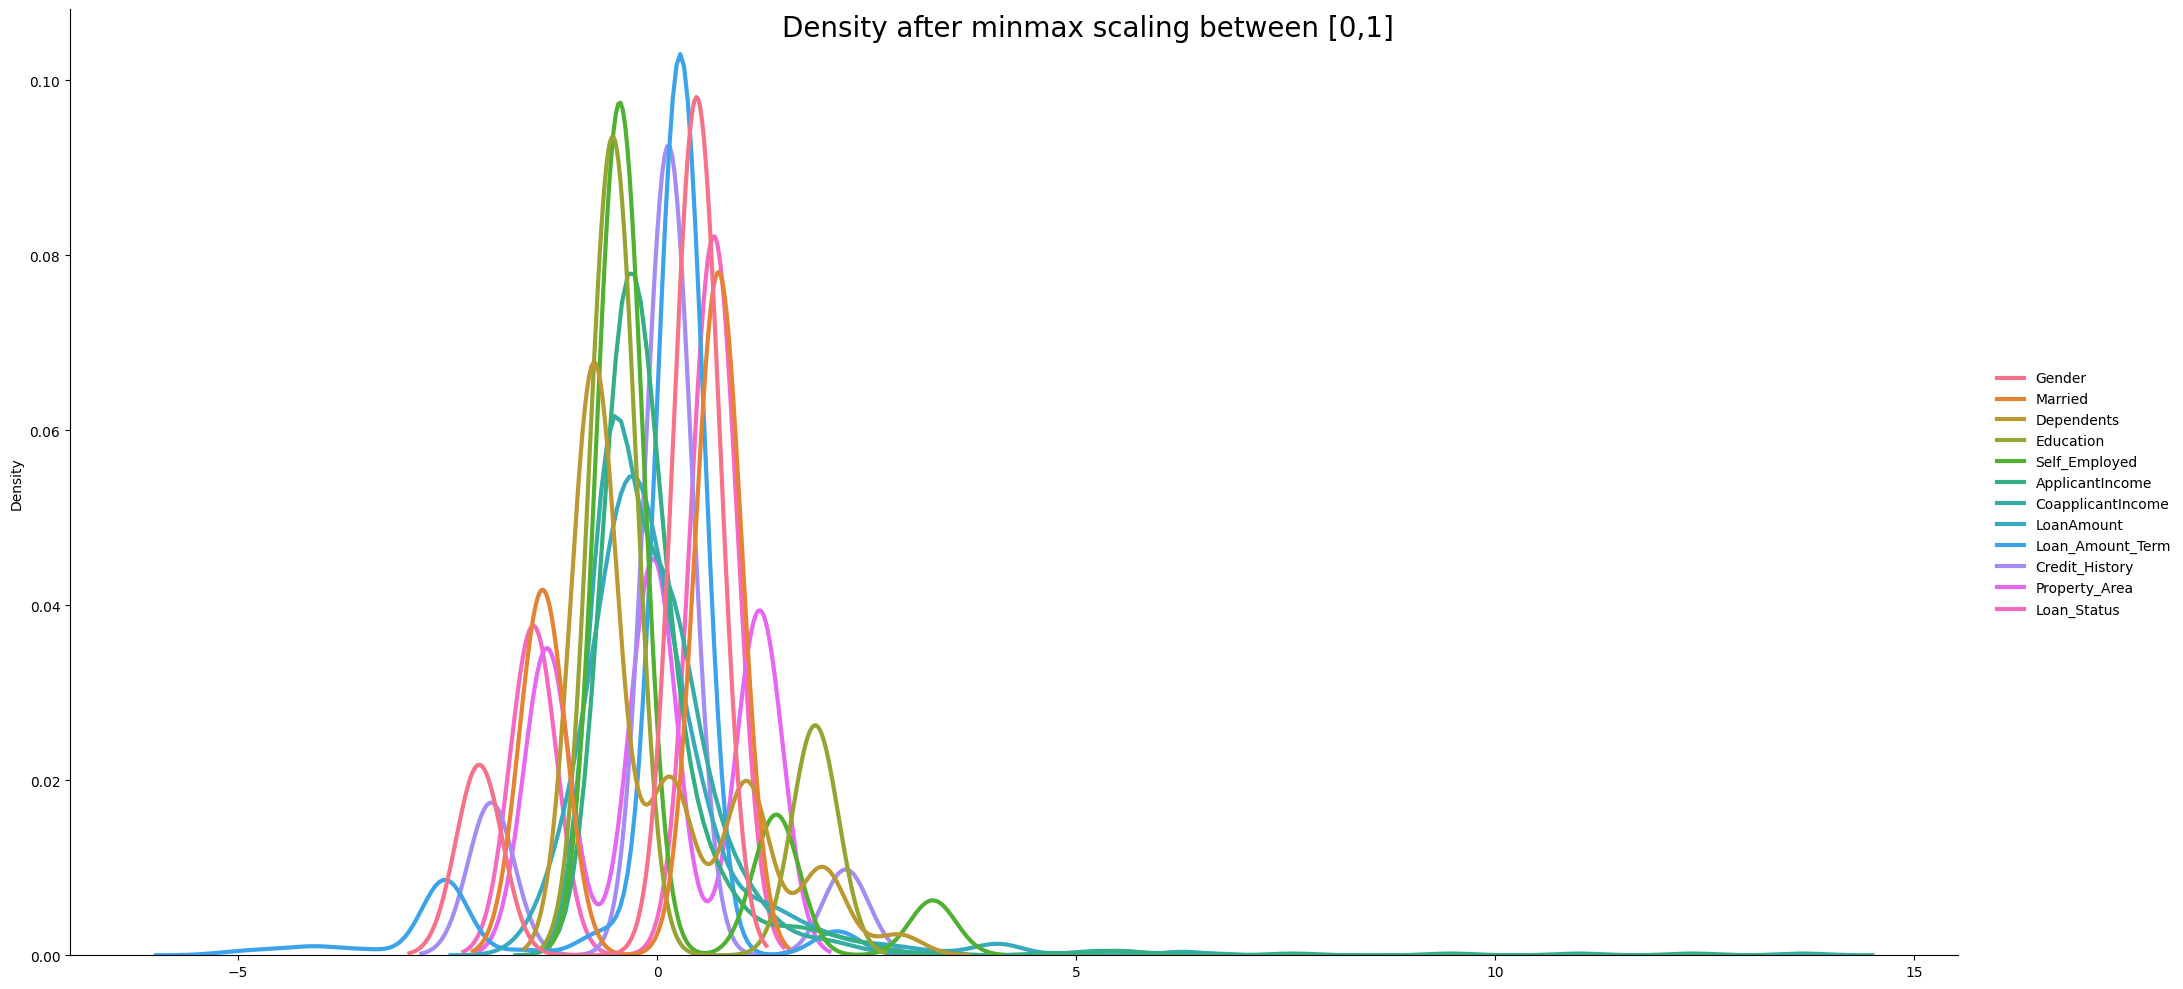

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.471169,-1.366947,-0.751224,-0.530021,-0.446348,0.073496,-0.555746,0.000490,0.275516,0.135039,1.223647,0.676930
1,0.471169,0.731557,0.157683,-0.530021,-0.446348,-0.133510,-0.040955,-0.218256,0.275516,0.135039,-1.315057,-1.477258
2,0.471169,0.731557,-0.751224,-0.530021,1.421586,-0.392350,-0.555746,-0.954844,0.275516,0.135039,1.223647,0.676930
3,0.471169,0.731557,-0.751224,1.886717,-0.446348,-0.460534,0.249212,-0.313299,0.275516,0.135039,1.223647,0.676930
4,0.471169,-1.366947,-0.751224,-0.530021,-0.446348,0.098187,-0.555746,-0.063809,0.275516,0.135039,1.223647,0.676930
...,...,...,...,...,...,...,...,...,...,...,...,...
606,-2.122382,-1.366947,-0.751224,-0.530021,-0.446348,-0.408701,-0.555746,-0.895442,0.275516,0.135039,-1.315057,0.676930
607,0.471169,0.731557,1.975495,-0.530021,-0.446348,-0.211505,-0.555746,-1.263737,-2.530152,0.135039,-1.315057,0.676930
608,0.471169,0.731557,0.157683,-0.530021,-0.446348,0.436984,-0.473816,1.266803,0.275516,0.135039,1.223647,0.676930
609,0.471169,0.731557,1.066589,-0.530021,-0.446348,0.357027,-0.555746,0.482692,0.275516,0.135039,1.223647,0.676930


In [177]:
# Before implementing KNN, we also need to normalize our data. 
from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler()
scaler = StandardScaler()
TrainData_knn = pd.DataFrame(scaler.fit_transform(TrainData_encoded), columns = TrainData_encoded.columns)
ax = sns.displot(TrainData_knn, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 3 )
ax.fig.suptitle('Density after minmax scaling between [0,1]', size = 20)
plt.show(ax)

TrainData_knn

Step 3) KNNImputer

In [178]:
# Finally, KNNImputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
TrainData_knn = pd.DataFrame(imputer.fit_transform(TrainData_knn),columns = TrainData_knn.columns)

TrainData = TrainData_knn.copy()
TrainData.isna().sum() # 0 for all! Missing values are no more. Data cleaned.

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [179]:
# Third Approach: Flagging
# Some data is missing not at random (MNAR). This means that the data is probably missing due to the feature itself.
# One example would be loan amount. If it is too high, people might refuse to say.
# Some data is missing at random. This means that the data is probably missing because of another measured variable.
# An example would be self-employment. Those working in rural areas such as farms might be trivially self-employed. We might
# trivially replace all the missing values with "No".
# Observing the data, credit history is the variable with most missing values. This may be due to applicants not being able
# to prove their credit history.
# In this case, data is missing completely at random (MCAT).
# We mention this approach, even though it may not be applicable to our project, because it is important to remember
# that even missing values can provide valuable information, which we may get rid of by imputing.

In [180]:
# Filled in missing values (using second approach)

print("example record: ", TrainData.values[0]) #example of record with missing num values
print("example record: ", TrainData.values[23]) #example of record with missing cat values
TrainData

example record:  [ 4.71168760e-01 -1.36694718e+00 -7.51223640e-01 -5.30021162e-01
 -4.46347538e-01  7.34964378e-02 -5.55745555e-01  4.89523318e-04
  2.75515640e-01  1.35039479e-01  1.22364665e+00  6.76929753e-01]
example record:  [ 0.47116876  0.73155716  1.06658881  1.88671712 -0.44634754 -0.33266775
  0.09866631 -0.40834298  0.27551564 -1.98057902 -1.31505659 -1.47725816]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.471169,-1.366947,-0.751224,-0.530021,-0.446348,0.073496,-0.555746,0.000490,0.275516,0.135039,1.223647,0.676930
1,0.471169,0.731557,0.157683,-0.530021,-0.446348,-0.133510,-0.040955,-0.218256,0.275516,0.135039,-1.315057,-1.477258
2,0.471169,0.731557,-0.751224,-0.530021,1.421586,-0.392350,-0.555746,-0.954844,0.275516,0.135039,1.223647,0.676930
3,0.471169,0.731557,-0.751224,1.886717,-0.446348,-0.460534,0.249212,-0.313299,0.275516,0.135039,1.223647,0.676930
4,0.471169,-1.366947,-0.751224,-0.530021,-0.446348,0.098187,-0.555746,-0.063809,0.275516,0.135039,1.223647,0.676930
...,...,...,...,...,...,...,...,...,...,...,...,...
606,-2.122382,-1.366947,-0.751224,-0.530021,-0.446348,-0.408701,-0.555746,-0.895442,0.275516,0.135039,-1.315057,0.676930
607,0.471169,0.731557,1.975495,-0.530021,-0.446348,-0.211505,-0.555746,-1.263737,-2.530152,0.135039,-1.315057,0.676930
608,0.471169,0.731557,0.157683,-0.530021,-0.446348,0.436984,-0.473816,1.266803,0.275516,0.135039,1.223647,0.676930
609,0.471169,0.731557,1.066589,-0.530021,-0.446348,0.357027,-0.555746,0.482692,0.275516,0.135039,1.223647,0.676930


### Normalization (extra)

Other methods that can be used in place of MinMaxScaler, to normalize our data

#### Transform within range [0, 1]

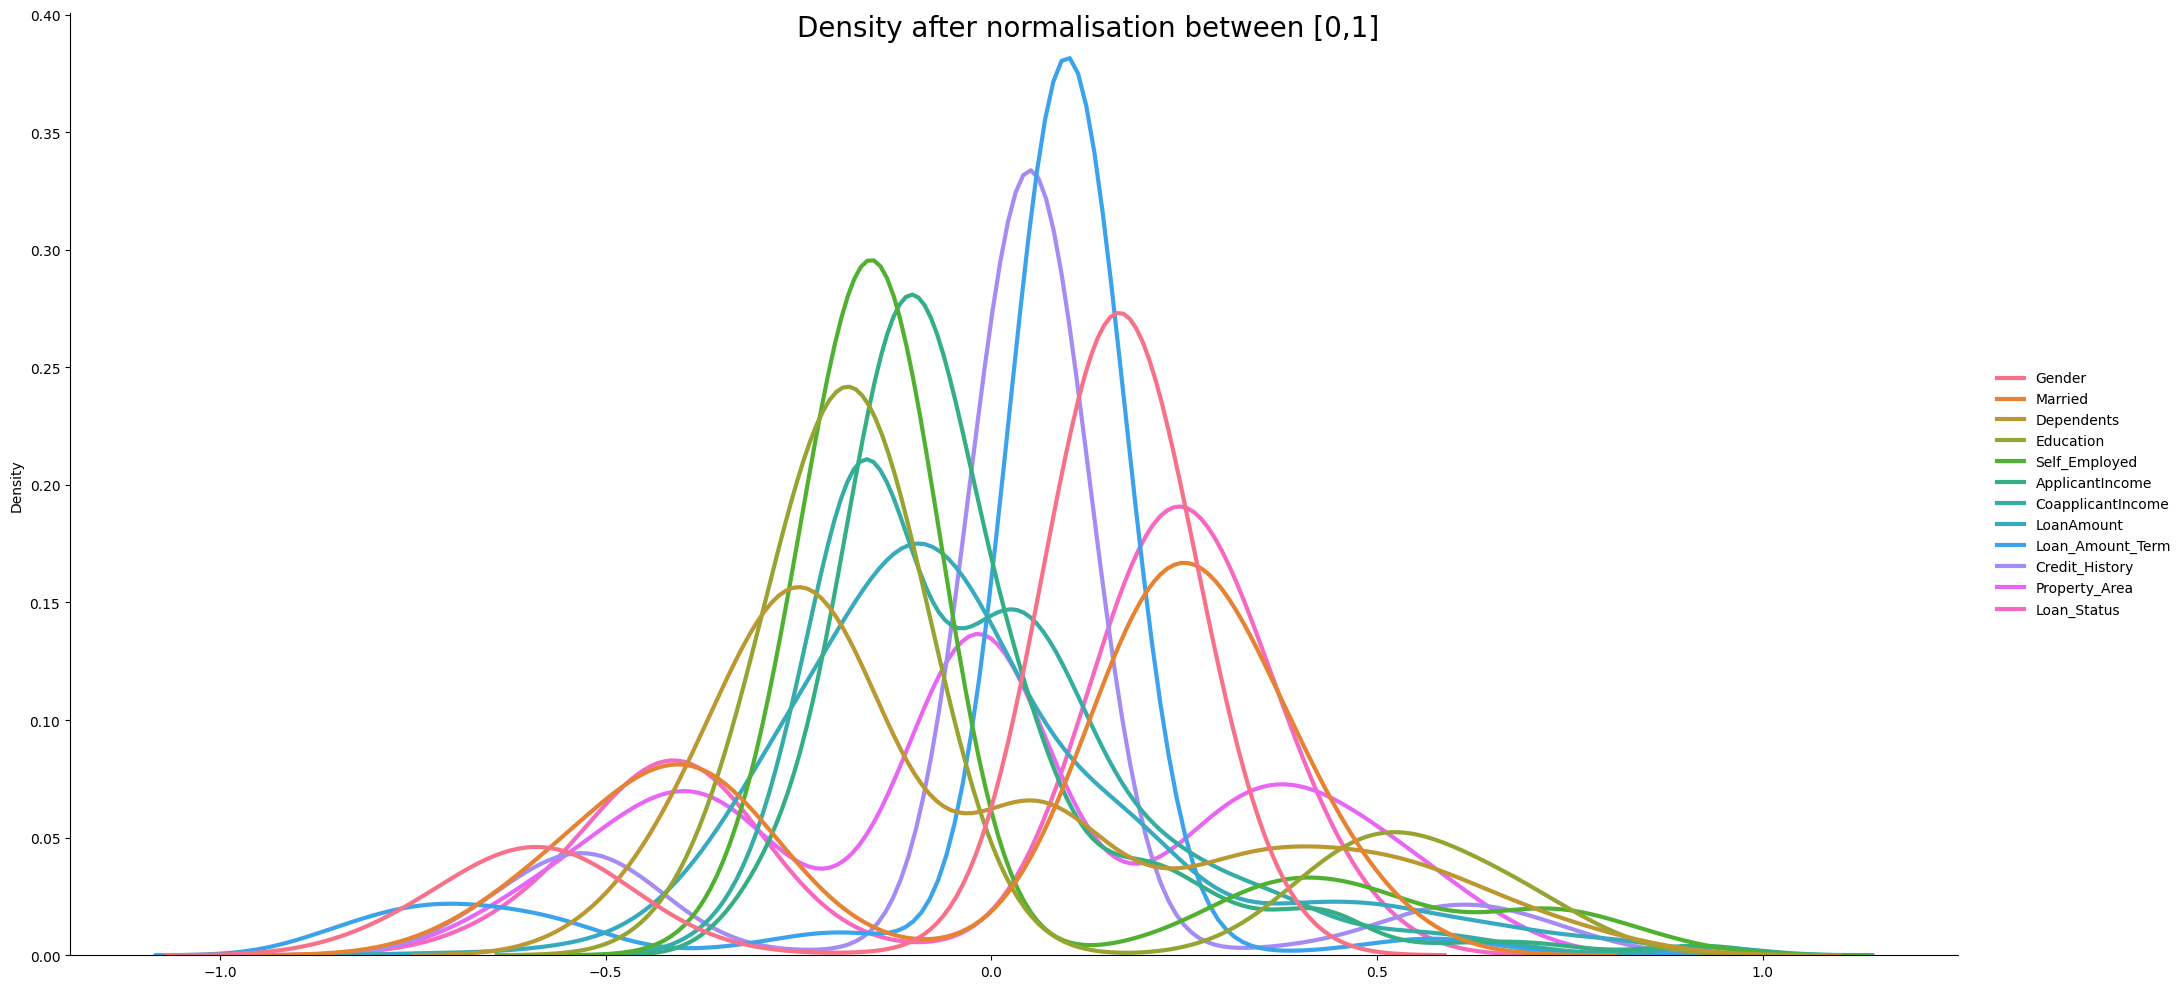

In [181]:
from sklearn.preprocessing import Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

TrainData_transform = TrainData.copy()
TrainData_transform = pd.DataFrame(Normalizer().fit_transform(TrainData), columns = TrainData.columns)
#print(TrainDatatransform)


ax2 = sns.displot(TrainData_transform, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 3 )
ax2.fig.suptitle('Density after normalisation between [0,1]', size = 20)
plt.show(ax2)

#### Sqrt Transform

d:\My Applications\anaconda3\envs\data-mining\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


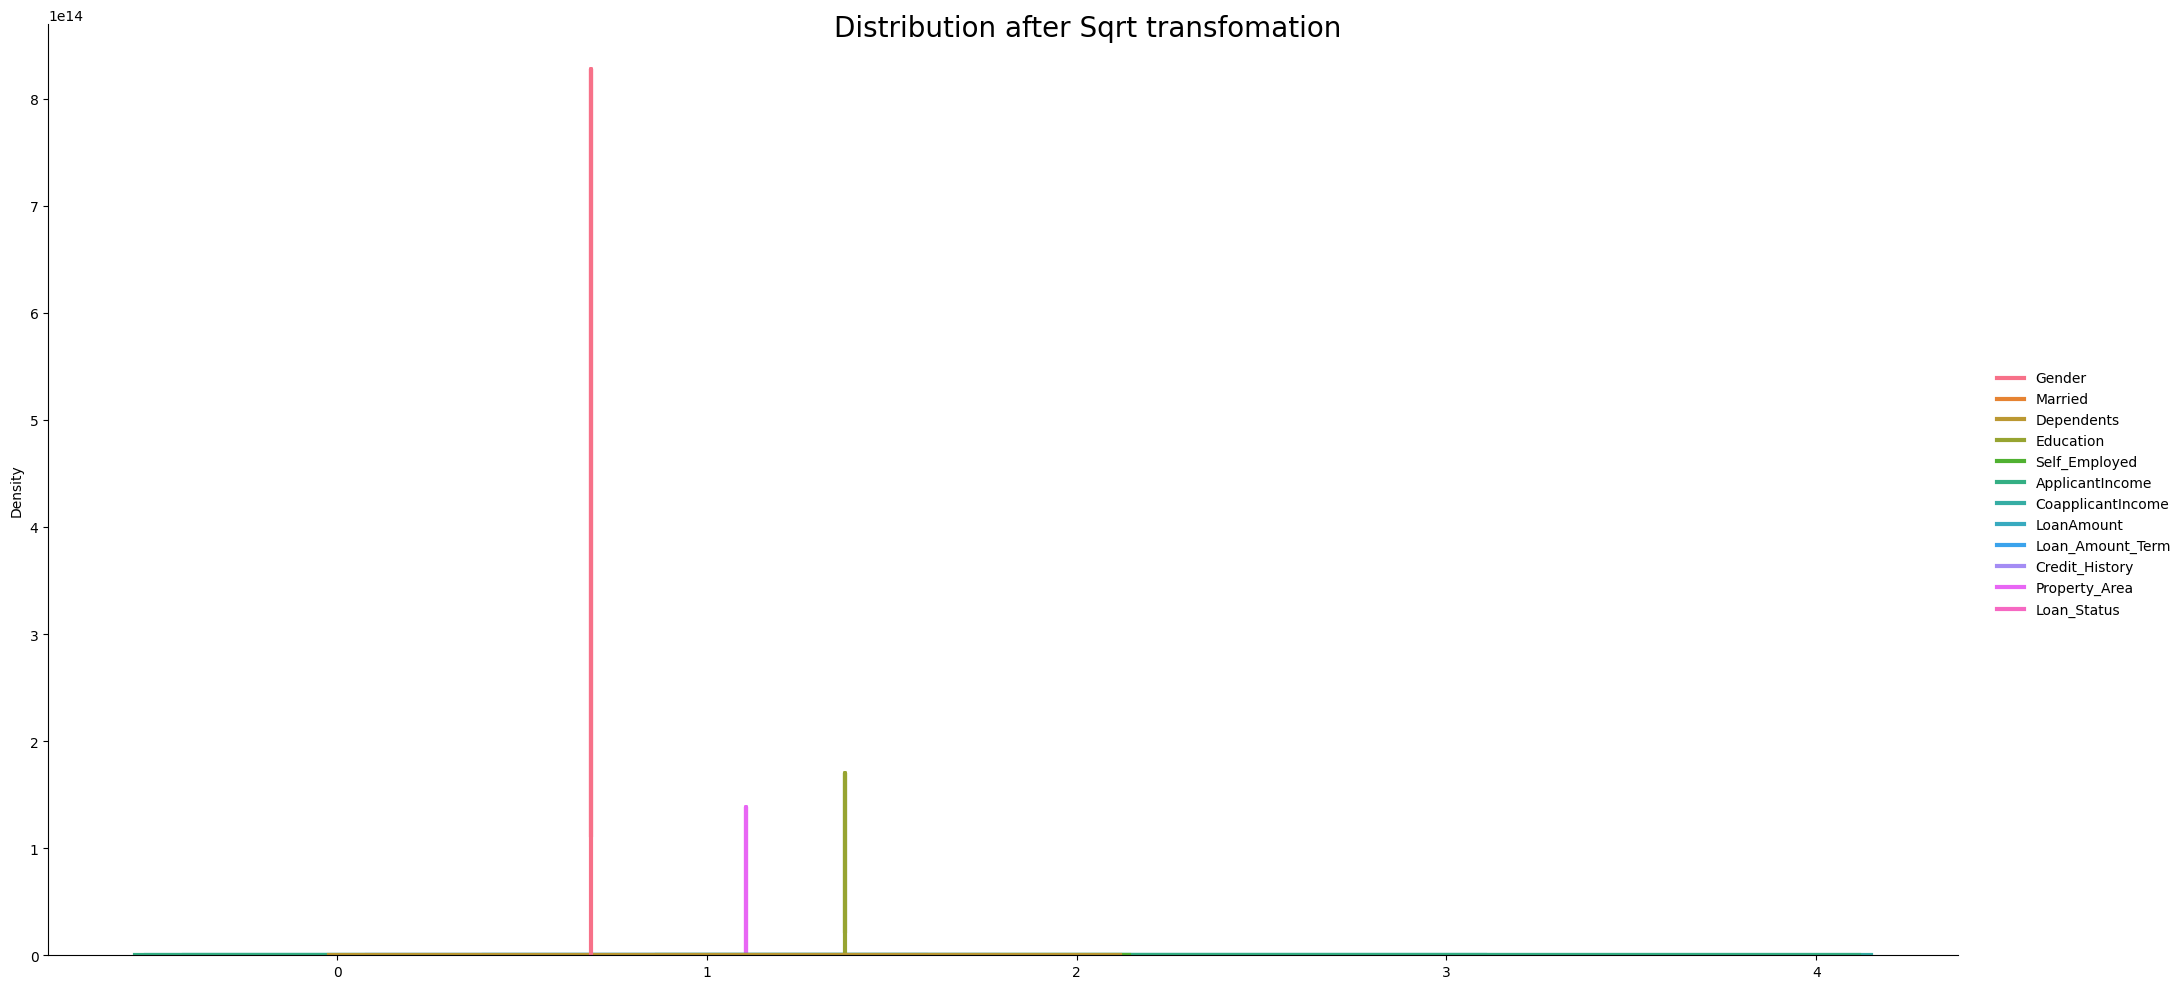

In [182]:
TrainData_log = TrainData.copy()
#TrainDataLogNorm = np.log(TrainData_log)

#ax1 = sns.displot(TrainDataLogNorm, kind = "kde",color = "#e64e4e", height=10, aspect =2,
            #linewidth = 3, warn_singular=False )
#ax1.fig.suptitle('Distribution after Log transfomation', size = 20)
#plt.show(ax1)

#Some densities haven't been plotted since variance approaches or is equal to zero
#So to prepare for PCA dimensionality reduction, use squareroot transformation instead
TrainData_sqrt = TrainData.copy()
TrainDataSqrtNorm = np.sqrt(TrainData_sqrt)

ax2 = sns.displot(TrainDataSqrtNorm, kind = "kde",color = "#e64e4e", height=10, aspect =2,
            linewidth = 3, warn_singular=False )
ax2.fig.suptitle('Distribution after Sqrt transfomation', size = 20)
plt.show(ax2)

### Outlier Detection

#### Extreme Value Analysis

In [183]:
# One method is Extreme Value Analysis, using interquartile range or z-score. This can only find outliers for numerical columns.
# It is useful for univariate outliers. We can use it for the columns with the widest set of values. So, for example, do not use for
# Credit_History, since there are only two values.

#IQR  
TrainData_XV = TrainData.copy()
Q1=TrainData_XV.quantile(0.25, numeric_only=True)
Q3=TrainData_XV.quantile(0.75, numeric_only=True)
IQR=Q3-Q1
TrainData_XV = TrainData_XV[~((TrainData_XV<(Q1-1.5*IQR)) | (TrainData_XV>(Q3+1.5*IQR)))]
print(TrainData_XV.shape) # No values are detected as outliers. This is predictable since we already normalized our dataset.
print(TrainData.shape)

(611, 12)
(611, 12)


In [184]:
#Z-score
TrainData_Z = TrainData.copy()

TrainData_Z_col = TrainData_Z['Self_Employed'] # TODO Repeat this for all columns
m = np.mean(TrainData_Z_col)
s = np.std(TrainData_Z_col)
TrainData_Z['Z-score'] = (TrainData_Z_col - m)/s
df_outlier = TrainData_Z[abs(TrainData_Z['Z-score']) >3]
df_outlier.shape # results
# 8 outliers for ApplicantIncome column
# 6 outliers for CoapplicantIncome column
# 0 outliers for Credit_History, Dependents, Education, Gender, Loan_Status, Married, Property_Area columns
# 15 outliers for LoanAmount column
# 12 outliers for Loan_Amount_Term column
# 32 outliers for Self_Employed column
# etc... We can see that this is not very useful since it is univariate analysis.

(32, 13)

#### Multilinear Regression

In [185]:
# Another numerical approach is using standardized residuals from a multilinear regression model.
# Note: since we previously encoded our dataset, we can use this method.

from sklearn.linear_model import LinearRegression 

X= TrainData.iloc[:, :-1].values  
y= TrainData.iloc[:, -1].values 

reg = LinearRegression()
model = reg.fit(X, y)
print("regression coefficients: ", reg.coef_)
print("regression intercept: ", reg.intercept_)
print("model evaluation (r^2)", reg.score(X, y)) #R^2

predicted = model.predict(X)
residuals = list(np.subtract(y, predicted))
standardized_residuals = residuals / np.std(residuals) # |value| > 2 is outlier
# print("\n", y, "\n")
# print(predicted, "\n")
#print(standardized_residuals, "\n") # 13 outlier

TrainData_LR = TrainData.copy()
TrainData_LR['standardized_residuals'] = standardized_residuals



# removing outliers
TrainData_LR = TrainData_LR.drop(index=[row for row in TrainData_LR.index if 
                                        TrainData_LR.loc[row, 'standardized_residuals'] > 2
                                        or TrainData_LR.loc[row, 'standardized_residuals'] < -2])
# deleting last column
TrainData_LR = TrainData_LR.drop(columns=['standardized_residuals'])
TrainData_LR # 13 outlier

regression coefficients:  [ 0.00608568  0.08552932  0.00836411 -0.08525093 -0.01820313  0.02436664
 -0.08375997 -0.07271279 -0.01682379  0.42815586  0.01317473]
regression intercept:  7.580081571833926e-17
model evaluation (r^2) 0.2039823868059163


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.471169,-1.366947,-0.751224,-0.530021,-0.446348,0.073496,-0.555746,0.000490,0.275516,0.135039,1.223647,0.676930
1,0.471169,0.731557,0.157683,-0.530021,-0.446348,-0.133510,-0.040955,-0.218256,0.275516,0.135039,-1.315057,-1.477258
2,0.471169,0.731557,-0.751224,-0.530021,1.421586,-0.392350,-0.555746,-0.954844,0.275516,0.135039,1.223647,0.676930
3,0.471169,0.731557,-0.751224,1.886717,-0.446348,-0.460534,0.249212,-0.313299,0.275516,0.135039,1.223647,0.676930
4,0.471169,-1.366947,-0.751224,-0.530021,-0.446348,0.098187,-0.555746,-0.063809,0.275516,0.135039,1.223647,0.676930
...,...,...,...,...,...,...,...,...,...,...,...,...
606,-2.122382,-1.366947,-0.751224,-0.530021,-0.446348,-0.408701,-0.555746,-0.895442,0.275516,0.135039,-1.315057,0.676930
607,0.471169,0.731557,1.975495,-0.530021,-0.446348,-0.211505,-0.555746,-1.263737,-2.530152,0.135039,-1.315057,0.676930
608,0.471169,0.731557,0.157683,-0.530021,-0.446348,0.436984,-0.473816,1.266803,0.275516,0.135039,1.223647,0.676930
609,0.471169,0.731557,1.066589,-0.530021,-0.446348,0.357027,-0.555746,0.482692,0.275516,0.135039,1.223647,0.676930


In [186]:
# corr matrix (for visualization)
TrainData_LR.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369184,0.161026,0.042753,-0.048149,0.061329,0.091189,0.106906,-0.084371,-0.040138,-0.026095,0.036600
Married,0.369184,1.000000,0.312952,0.013287,-0.036118,0.052527,0.083804,0.146582,-0.103415,0.028072,0.004451,0.094848
Dependents,0.161026,0.312952,1.000000,0.059784,0.018532,0.104207,0.023701,0.136626,-0.080836,-0.098979,0.028621,-0.018808
Education,0.042753,0.013287,0.059784,1.000000,-0.015645,-0.140780,-0.064343,-0.168250,-0.074758,-0.045208,-0.061700,-0.084339
Self_Employed,-0.048149,-0.036118,0.018532,-0.015645,1.000000,0.101731,0.057151,0.081730,-0.042780,0.053130,-0.037798,0.043742
ApplicantIncome,0.061329,0.052527,0.104207,-0.140780,0.101731,1.000000,-0.112977,0.567568,-0.043818,-0.034381,-0.011971,-0.006977
CoapplicantIncome,0.091189,0.083804,0.023701,-0.064343,0.057151,-0.112977,1.000000,0.192724,-0.061471,0.077651,0.017300,-0.059347
LoanAmount,0.106906,0.146582,0.136626,-0.168250,0.081730,0.567568,0.192724,1.000000,0.035188,0.019267,-0.053162,-0.030980
Loan_Amount_Term,-0.084371,-0.103415,-0.080836,-0.074758,-0.042780,-0.043818,-0.061471,0.035188,1.000000,-0.022129,-0.077100,-0.016138
Credit_History,-0.040138,0.028072,-0.098979,-0.045208,0.053130,-0.034381,0.077651,0.019267,-0.022129,1.000000,0.027820,0.532699


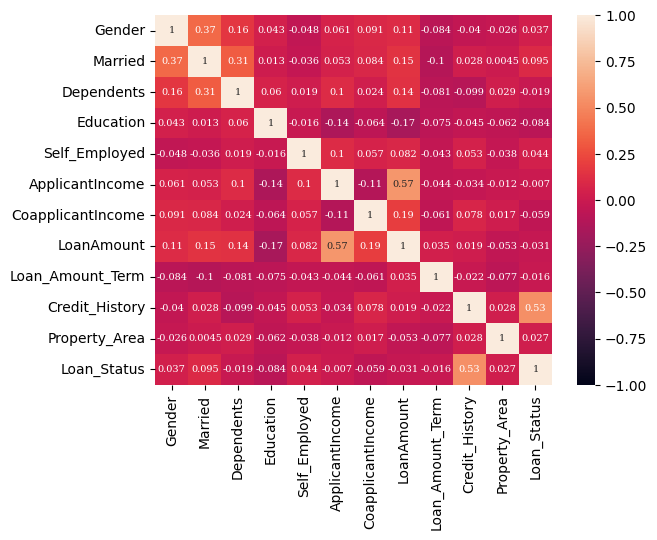

In [187]:
# heatmap

font = {'family': 'serif',
        #'color':  'darkred',
        'weight': 'normal',
        'size': 7,
        }

sns.heatmap(
    TrainData_LR.corr(),         
    annot=True, annot_kws=font,
    vmin=-1, vmax=1) # more lightly colored = more highly correlated
plt.show()

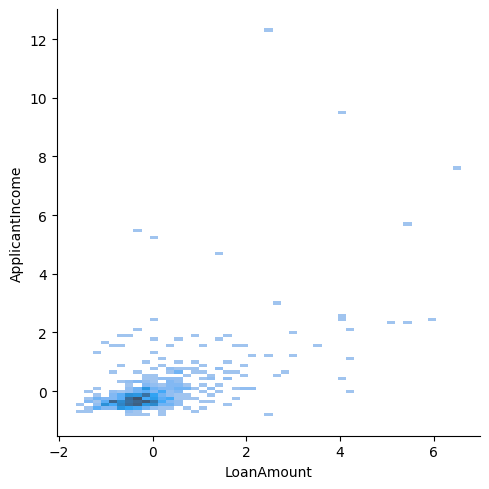

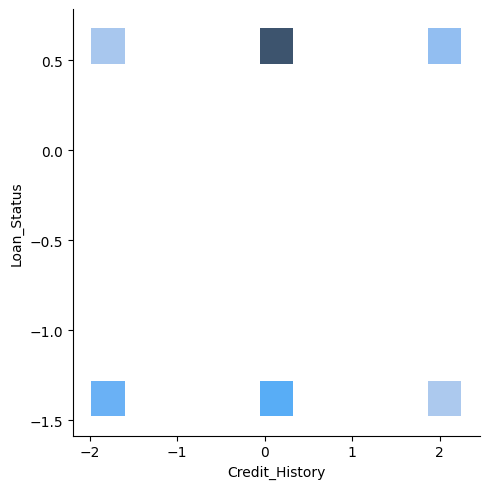

In [188]:
# Plotting LoanAmount, ApplicantIncome, Credit_History, and Loan_Status

#both numerical
sns.displot(
    data=TrainData_LR,
    #kind="kde", 
    x="LoanAmount", 
    y="ApplicantIncome", 
    #hue="Loan_Status",
    #col="Credit_History"
)
plt.show()
# both categorical
sns.displot(
    data=TrainData_LR,
    #kind="swarm", 
    x="Credit_History", 
    y="Loan_Status"
)
plt.show()

#### Isolation Forest (extra)

In [189]:
# An approach that can be used for both multivariate and univariate analysis is Isolation Forest. 
# This approach splits the data and isolates the samples in the form of a tree.
# The number of splittings required to isolate an outlier is lower than normal data.
# This is a type of unsupervised anomaly detection

from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(0.05), random_state=42) 
# try with contamination = 0.001, 0.1, 0.5 to change the number of outliers we want to eliminate
model_IF.fit(TrainData)

TrainData_IF = TrainData_LR.copy()
input_features = TrainData_IF.columns
TrainData_IF['anomaly_scores'] = model_IF.decision_function(TrainData_IF[input_features]) # outlier score. -ve -> outlier
TrainData_IF['anomaly'] = model_IF.predict(TrainData_IF[input_features]) # outlier:-1  inlier:1

TrainData_IF # 27 outlier
#print(model_IF.decision_function(TrainData_IF[input_features]))
#print(model_IF.predict(TrainData_IF[input_features]))

d:\My Applications\anaconda3\envs\data-mining\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,anomaly_scores,anomaly
0,0.471169,-1.366947,-0.751224,-0.530021,-0.446348,0.073496,-0.555746,0.000490,0.275516,0.135039,1.223647,0.676930,0.159043,1
1,0.471169,0.731557,0.157683,-0.530021,-0.446348,-0.133510,-0.040955,-0.218256,0.275516,0.135039,-1.315057,-1.477258,0.136300,1
2,0.471169,0.731557,-0.751224,-0.530021,1.421586,-0.392350,-0.555746,-0.954844,0.275516,0.135039,1.223647,0.676930,0.131006,1
3,0.471169,0.731557,-0.751224,1.886717,-0.446348,-0.460534,0.249212,-0.313299,0.275516,0.135039,1.223647,0.676930,0.125402,1
4,0.471169,-1.366947,-0.751224,-0.530021,-0.446348,0.098187,-0.555746,-0.063809,0.275516,0.135039,1.223647,0.676930,0.159043,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-2.122382,-1.366947,-0.751224,-0.530021,-0.446348,-0.408701,-0.555746,-0.895442,0.275516,0.135039,-1.315057,0.676930,0.108766,1
607,0.471169,0.731557,1.975495,-0.530021,-0.446348,-0.211505,-0.555746,-1.263737,-2.530152,0.135039,-1.315057,0.676930,0.074110,1
608,0.471169,0.731557,0.157683,-0.530021,-0.446348,0.436984,-0.473816,1.266803,0.275516,0.135039,1.223647,0.676930,0.153038,1
609,0.471169,0.731557,1.066589,-0.530021,-0.446348,0.357027,-0.555746,0.482692,0.275516,0.135039,1.223647,0.676930,0.159938,1


In [190]:
# Which method to use? Linear Regression.

TrainData = TrainData_LR.copy()

### Handle Noisy Data (extra)

#### Binning By pd.cut

In [191]:
#Bin by Applicant Income, Coapplicant Income, LoanAmount, Loan_Status
print(TrainData['ApplicantIncome'].describe(), '\n')
#ApplicantIncomeCut = pd.cut(TrainData.iloc[:, 5], 4)
#print(ApplicantIncomeCut)
Bins = 10 #example number of bins
BinSize = (81000 - 150)/Bins
print(pd.cut(TrainData['ApplicantIncome'], Bins, precision = 0).value_counts(sort=False))

count    598.000000
mean       0.002398
std        1.009759
min       -0.858359
25%       -0.412380
50%       -0.266691
75%        0.060824
max       12.361598
Name: ApplicantIncome, dtype: float64 

(-1.0, 0.0]     519
(0.0, 2.0]       57
(2.0, 3.0]       15
(3.0, 4.0]        0
(4.0, 6.0]        4
(6.0, 7.0]        0
(7.0, 8.0]        1
(8.0, 10.0]       1
(10.0, 11.0]      0
(11.0, 12.0]      1
Name: ApplicantIncome, dtype: int64


In [192]:
print(TrainData['CoapplicantIncome'].describe(), '\n')
print(pd.cut(TrainData['CoapplicantIncome'], Bins, precision = 0).value_counts(sort=False))

count    598.000000
mean      -0.006186
std        1.002081
min       -0.555746
25%       -0.555746
50%       -0.150024
75%        0.219086
max       13.668239
Name: CoapplicantIncome, dtype: float64 

(-1.0, 1.0]     548
(1.0, 2.0]       44
(2.0, 4.0]        2
(4.0, 5.0]        0
(5.0, 7.0]        2
(7.0, 8.0]        0
(8.0, 9.0]        0
(9.0, 11.0]       0
(11.0, 12.0]      1
(12.0, 14.0]      1
Name: CoapplicantIncome, dtype: int64


In [193]:
print(TrainData['LoanAmount'].describe(), '\n')
print(pd.cut(TrainData['LoanAmount'], Bins, precision = 0).value_counts(sort=False))

count    598.000000
mean      -0.004263
std        1.005954
min       -1.632031
25%       -0.550909
50%       -0.218256
75%        0.185680
max        6.577371
Name: LoanAmount, dtype: float64 

(-1.6, -0.8]     70
(-0.8, 0.01]    327
(0.01, 0.8]     136
(0.8, 1.7]       31
(1.7, 2.5]       15
(2.5, 3.3]        6
(3.3, 4.1]        5
(4.1, 4.9]        3
(4.9, 5.8]        3
(5.8, 6.6]        2
Name: LoanAmount, dtype: int64


In [194]:
print(TrainData['Loan_Status'].describe(), '\n')
print(pd.cut(TrainData['Loan_Status'], Bins, precision = 0).value_counts(sort=False))

count    598.000000
mean       0.028512
std        0.988941
min       -1.477258
25%       -1.477258
50%        0.676930
75%        0.676930
max        0.676930
Name: Loan_Status, dtype: float64 

(-1.5, -1.3]    180
(-1.3, -1.0]      0
(-1.0, -0.8]      0
(-0.8, -0.6]      0
(-0.6, -0.4]      0
(-0.4, -0.2]      0
(-0.2, 0.03]      0
(0.03, 0.2]       0
(0.2, 0.5]        0
(0.5, 0.7]      418
Name: Loan_Status, dtype: int64


In [195]:
# When categories are harder to define, we will use binning methods.

# move this to after Binning and (maybe) change up the binned vars
# sns.scatterplot( data=TrainData,
#     x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
# )

#### Binning By Feature Engine

In [196]:
import numpy.typing
from feature_engine.discretisation import EqualWidthDiscretiser
#Bin by Applicant Income, Coapplicant Income, Loan Amount, Loan_Status
ApplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
#ApplicantIncomeFE.fit(TrainData)
#ApplicantIncomeFE.transform(TrainData)["ApplicantIncome_b"].value_counts()
#ApplicantIncomeFE = EqualWidthDiscretiser()
#print(ApplicantIncomeFE)
ApplicantIncomeFE.fit(TrainData)
ApplicantIncomeFE.transform(TrainData)["ApplicantIncome"].value_counts()

(-inf, 0.464]     519
(0.464, 1.786]     57
(1.786, 3.108]     15
(4.43, 5.752]       4
(7.074, 8.396]      1
(8.396, 9.718]      1
(11.04, inf]        1
Name: ApplicantIncome, dtype: int64

In [197]:
CoapplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
CoapplicantIncomeFE.fit(TrainData)
CoapplicantIncomeFE.transform(TrainData)["CoapplicantIncome"].value_counts()

(-inf, 0.867]       548
(0.867, 2.289]       44
(2.289, 3.711]        2
(5.134, 6.556]        2
(10.823, 12.246]      1
(12.246, inf]         1
Name: CoapplicantIncome, dtype: int64

In [198]:
LoanAmountFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
LoanAmountFE.fit(TrainData)
LoanAmountFE.transform(TrainData)["LoanAmount"].value_counts()

(-0.811, 0.00985]    327
(0.00985, 0.831]     136
(-inf, -0.811]        70
(0.831, 1.652]        31
(1.652, 2.473]        15
(2.473, 3.294]         6
(3.294, 4.115]         5
(4.935, 5.756]         3
(4.115, 4.935]         3
(5.756, inf]           2
Name: LoanAmount, dtype: int64

In [199]:
# When categories are harder to define, we will use binning methods.

#TODO move this to after Binning and (maybe) change up the binned vars
# sns.scatterplot( data=TrainData,
#     x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
# )

#### Binning By KBinsDiscretizer Example

In [200]:
from sklearn.preprocessing import KBinsDiscretizer

In [201]:
#Default bins
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.073496          -0.555746    0.000490          0.275516   
1          -0.133510          -0.040955   -0.218256          0.275516   
2          -0.392350          -0.555746   -0.954844          0.275516   
3          -0.460534           0.249212   -0.313299          0.275516   
4           0.098187          -0.555746   -0.063809          0.275516   
..               ...                ...         ...               ...   
606        -0.408701          -0.555746   -0.895442          0.275516   
607        -0.211505          -0.555746   -1.263737         -2.530152   
608         0.436984          -0.473816    1.266803          0.275516   
609         0.357027          -0.555746    0.482692          0.275516   
610        -0.133510          -0.555746   -0.158853          0.275516   

     Credit_History  
0          0.135039  
1          0.135039  
2          0.135039  
3          0.135039  
4          0.

In [202]:
#Default bins #Number of bins has been decresed
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 2, strategy = 'quantile', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.073496          -0.555746    0.000490          0.275516   
1          -0.133510          -0.040955   -0.218256          0.275516   
2          -0.392350          -0.555746   -0.954844          0.275516   
3          -0.460534           0.249212   -0.313299          0.275516   
4           0.098187          -0.555746   -0.063809          0.275516   
..               ...                ...         ...               ...   
606        -0.408701          -0.555746   -0.895442          0.275516   
607        -0.211505          -0.555746   -1.263737         -2.530152   
608         0.436984          -0.473816    1.266803          0.275516   
609         0.357027          -0.555746    0.482692          0.275516   
610        -0.133510          -0.555746   -0.158853          0.275516   

     Credit_History  
0          0.135039  
1          0.135039  
2          0.135039  
3          0.135039  
4          0.

In [203]:
# When categories are harder to define, we will use binning methods.

#TODO move this to after Binning and (maybe) change up the binned vars
# sns.scatterplot( data=TrainData,
#     x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
# )

## DATA CLASSIFICATION

### Decision Tree

Some techniques to improve accuracy and reduce overfitting

In [217]:
# Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. 
# use sample_weight parameter in clf.fit()
# Pre-pruning, Post-pruning, Random Forest

# You can also do binning as discussed in the lecture. Binning will group similar data into bins to reduce overfitting.

# We decide to use dimensionality reduction: PCA.

#### PCA (dimensionality reduction)

In [229]:
print(TrainData.shape)


from sklearn.model_selection import train_test_split # Import train_test_split function

# # 80/20 split
# data_train = TrainData.iloc[0:478 , :]
# print (data_train.shape)
# data_test = TrainData.iloc[478: , :]
# print (data_test.shape)

X = TrainData.iloc[:, 0:11]
y = TrainData['Loan_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle = True) # 80% training and 20% test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(598, 12)
(478, 11)
(478,)
(120, 11)
(120,)


In [231]:
#PCA can be trained by various methods, two are discussed here: Logistic Regression and Random Forest
#Logistic Regression:predicts binary output
#Uses 1/ 1 + exp(-(bo + b1*x))
#Random Forest:uses multiple decision trees and combines their output to get a decision
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pca = PCA(n_components=.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
print("variance: ", explained_variance)
print("train pca ", X_train_pca)
print("train ", X_train)

variance:  [0.17638923 0.13587854 0.10843029 0.09701789 0.09385443 0.0857363
 0.07937966 0.0748233  0.0654636  0.05031384]
train pca  [[-0.79001664  0.86041148  0.34963809 ...  0.45504446 -0.3513855
  -1.00292451]
 [ 0.1046145  -0.7525574  -1.27323997 ...  0.01736033 -0.02136211
   0.61269166]
 [-0.59133252 -0.69766711 -0.13450934 ... -0.86870233 -0.15087647
   0.04693934]
 ...
 [ 1.25870379 -0.91591744  0.27150398 ... -1.20063217  0.52455358
  -0.52374213]
 [-0.19039961  0.44197274  1.70368171 ... -0.43992194 -0.55950844
  -1.12986997]
 [-1.38026401  0.38094216 -0.34508492 ...  1.15748953 -1.05976948
  -0.86869444]]
train         Gender   Married  Dependents  Education  Self_Employed  \
85   0.471169 -1.366947   -0.751224  -0.530021      -0.446348   
581  0.471169  0.731557    0.157683  -0.530021      -0.446348   
355  0.471169  0.731557    0.157683  -0.530021      -0.446348   
555  0.471169  0.731557   -0.751224  -0.530021      -0.446348   
36   0.471169  0.731557   -0.751224  -0.530

#### Model Construction 

In [232]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) # through trial and error, most accurate
# insert data columns without class label in first argument  , and insert class label in second argument
clf = clf.fit(X_train_pca, y_train)#, sample_weight=[0,1]) 
# Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant.

# for print tree 
#print (plot_tree(clf))

print(clf.tree_.threshold)
print(clf.tree_.impurity)

ValueError: Unknown label type: 'continuous'

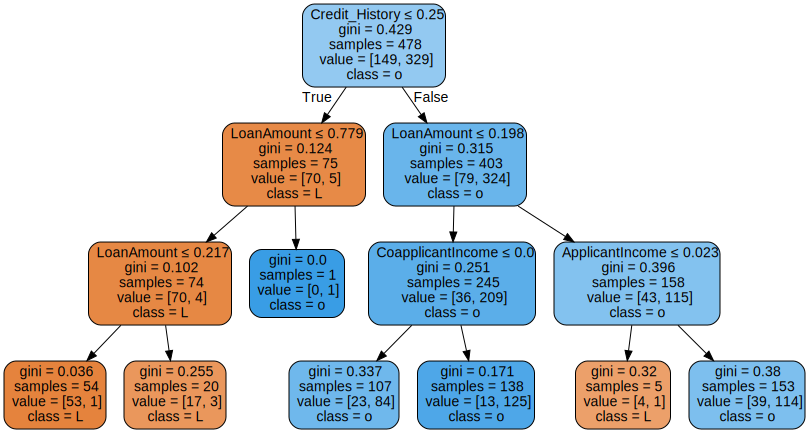

In [141]:
#tree visualization

import graphviz


dot_data = export_graphviz(clf, out_file=None, 
                      feature_names=TrainData.columns[0:10],  
                      class_names=TrainData.columns[11],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("decision tree") 
graph  

accuracy =  0.825
confusion matrix =  [[12 19]
 [ 2 87]]


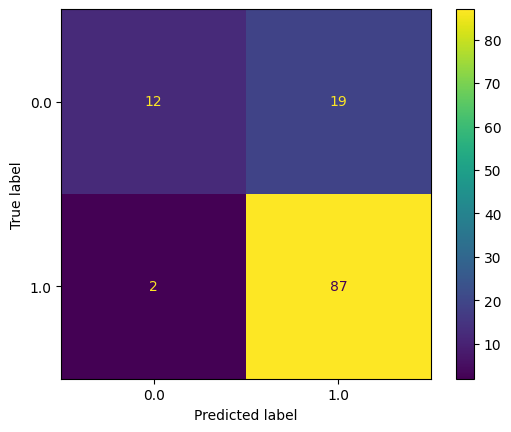

In [142]:
#insert test_data without class label to predict from classifier 
y_pred = clf.predict(X_test)
# print(res)
# insert the real class label for test data and predicted result to calculate accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print ("accuracy = ",  accuracy)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix = ", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### KNN

### Naive Bayes

### Linear Regression